In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 749.5, 999.5, -0.5)

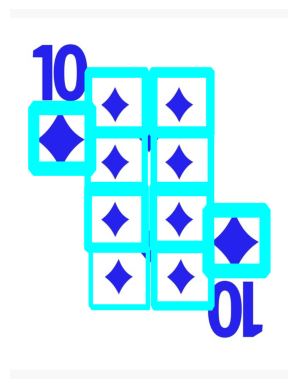

In [6]:
# Read the main image
img_rgb = cv2.imread('card.png')
 
# Convert it to grayscale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
 
# Read the template
template = cv2.imread('diamond.png', 0)
 
# Store width and height of template in w and h
w, h = template.shape[::-1]
 
# Perform match operations.
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
 
# Specify a threshold
threshold = 0.65
 
# Store the coordinates of matched area in a numpy array
loc = np.where(res >= threshold)
 
# Draw a rectangle around the matched region.
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 2)
 
plt.imshow(img_rgb)
plt.axis('off')

In [7]:
def sp_noise(image,prob):
    output = np.zeros(image.shape, np.uint8)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

In [ ]:
import cv2
import numpy as np
import tkinter as tk

template_path = 'diamond.png'
image_path = 'card.png'


def update_value(event):
    image = cv2.imread(image_path)
    image_temp = image.copy()
    ajusted_image = cv2.convertScaleAbs(image_temp, alpha=slider_alpha.get(), beta=slider_beta.get())
    noise = image.copy()
#     img_gray = cv2.cvtColor(noise, cv2.COLOR_BGR2GRAY)
    cv2.randn(noise, slider_noisy.get(), 30)

    # Добавление шума к изображению
#     noise = cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB)
    noisy_image = ajusted_image + noise
    
    
#     noisy_image = sp_noise(ajusted_image, slider_noisy.get())


    height, width = image.shape[:2]
    center = (width // 2, height // 2)

    # Генерация матрицы преобразования для масштабирования и поворота
    transformation_matrix = cv2.getRotationMatrix2D(center, slider_angle.get(), slider_scale_factor.get())

    # Применение преобразования к изображению
    scaled_rotated_image = cv2.warpAffine(noisy_image, transformation_matrix, (width, height))

    detect_object(template_path, scaled_rotated_image)


def detect_object(template_path, image):
    # Загрузка шаблона
    template = cv2.imread(template_path, cv2.IMREAD_COLOR)

    # Преобразование изображения в оттенки серого
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

    # Производим сопоставление шаблона с изображением
    result = cv2.matchTemplate(gray_image, gray_template, cv2.TM_CCOEFF_NORMED)

    # Определение области детектирования
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    top_left = max_loc
    h, w = template.shape[:2]
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Рисуем прямоугольник вокруг обнаруженного объекта
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

    # Выводим результат
    cv2.imshow('Detection Result', image)


# Создаем главное окно
root = tk.Tk()

# Создаем ползунок
slider_alpha = tk.Scale(root, from_=1, to=15, orient="horizontal", command=update_value)
slider_beta = tk.Scale(root, from_=0, to=100, orient="horizontal", command=update_value)
slider_noisy = tk.Scale(root, from_=0, to=100, orient="horizontal", command=update_value)
slider_angle = tk.Scale(root, resolution=1, from_=0, to=360, orient="horizontal", command=update_value)
slider_scale_factor = tk.Scale(root, resolution=0.1, from_=1, to=2, orient="horizontal", command=update_value)

slider_alpha.set(1)
slider_beta.set(0)
slider_noisy.set(0)
slider_angle.set(0)
slider_scale_factor.set(1)

slider_alpha.pack()
slider_beta.pack()
slider_noisy.pack()
slider_angle.pack()
slider_scale_factor.pack()

root.mainloop()
